In [20]:
import pandas as pd
import sklearn.tree

In [21]:
phonecase = pd.read_csv("../../../data/phonecase.csv")

In [22]:
phonecase.head()

,Age,Income,Colour
0,12,0,Red
1,14,10,Red
2,15,0,Red
3,17,500,Yellow
4,18,10000,Red


In [23]:
classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1)

In [24]:
classifier.fit(phonecase[['Age', 'Income']], phonecase[['Colour']])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
classifier.predict([41, 60000])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Pink'], dtype=object)

In [26]:
classifier.predict([20, 1000])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['Yellow'], dtype=object)

In [27]:
classifier.predict(phonecase[['Age', 'Income']])

array(['Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow',
       'Yellow', 'Yellow', 'Yellow', 'Pink', 'Pink', 'Pink', 'Pink',
       'Pink', 'Pink', 'Pink', 'Pink', 'Pink'], dtype=object)

In [28]:
classifier.feature_importances_

array([ 1.,  0.])

In [45]:
import StringIO
file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(classifier, out_file=file_obj)

In [46]:
print file_obj.getvalue()

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 24.0\ngini = 0.6667\nsamples = 18\nvalue = [6, 6, 6]"] ;
1 [label="gini = 0.4938\nsamples = 9\nvalue = [0, 4, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.4938\nsamples = 9\nvalue = [6, 2, 1]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


In [78]:
import pydotplus

In [79]:
graph = pydotplus.graph_from_dot_data(file_obj.getvalue())

In [80]:
import IPython.display

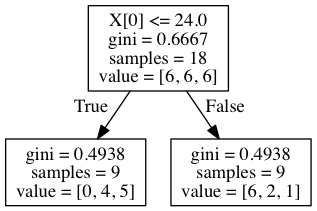

In [81]:
IPython.display.Image(graph.create_png())

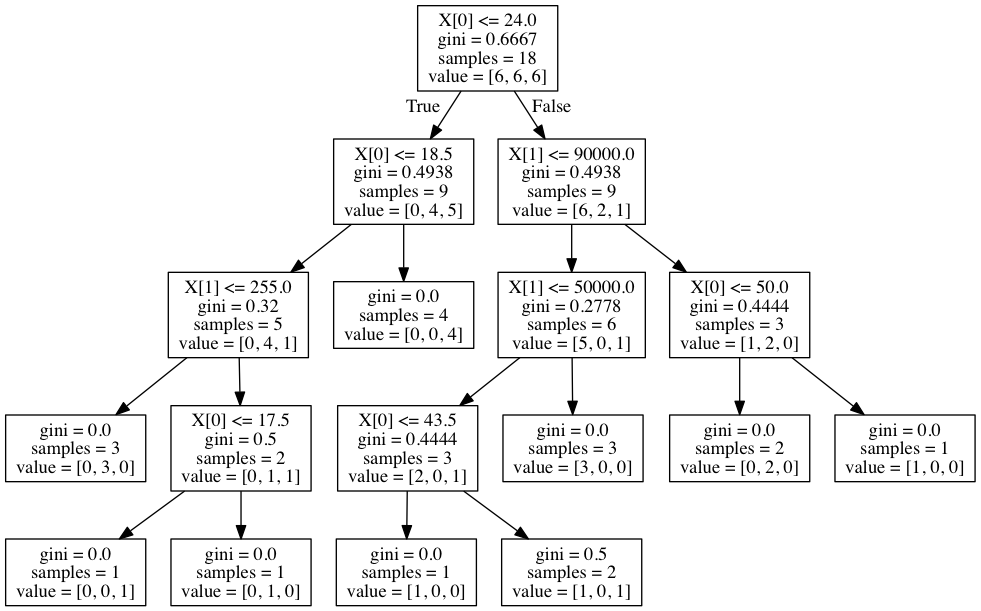

In [86]:
new_classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
new_classifier.fit(phonecase[['Age','Income']], phonecase[['Colour']])
new_file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(new_classifier, out_file=new_file_obj)
new_graph = pydotplus.graph_from_dot_data(new_file_obj.getvalue())
IPython.display.Image(new_graph.create_png())

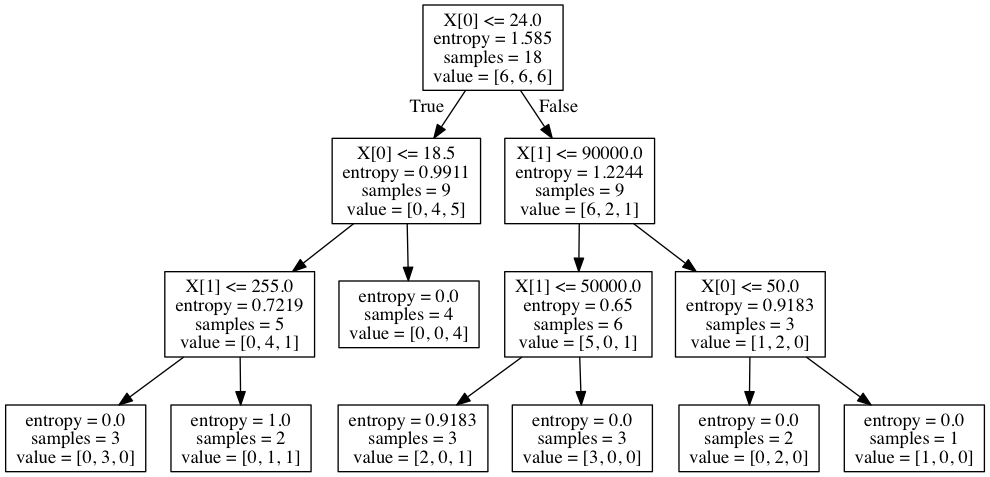

In [88]:
entropy_classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
entropy_classifier.fit(phonecase[['Age','Income']], phonecase[['Colour']])
entropy_file_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(entropy_classifier, out_file=entropy_file_obj)
entropy_graph = pydotplus.graph_from_dot_data(entropy_file_obj.getvalue())
IPython.display.Image(entropy_graph.create_png())

In [89]:
#we can weight the pink phone cases so it calculates it different depending on whether we use gini or entropy

In [91]:
entropy_classifier.feature_importances_
#70% of differences boil down to their age, 29% boil down to income

array([ 0.70054326,  0.29945674])